In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:

# Load the dataset
df = pd.read_csv('Housing.csv')

# Display the first few rows of the dataset
df.head()
    

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0          True  

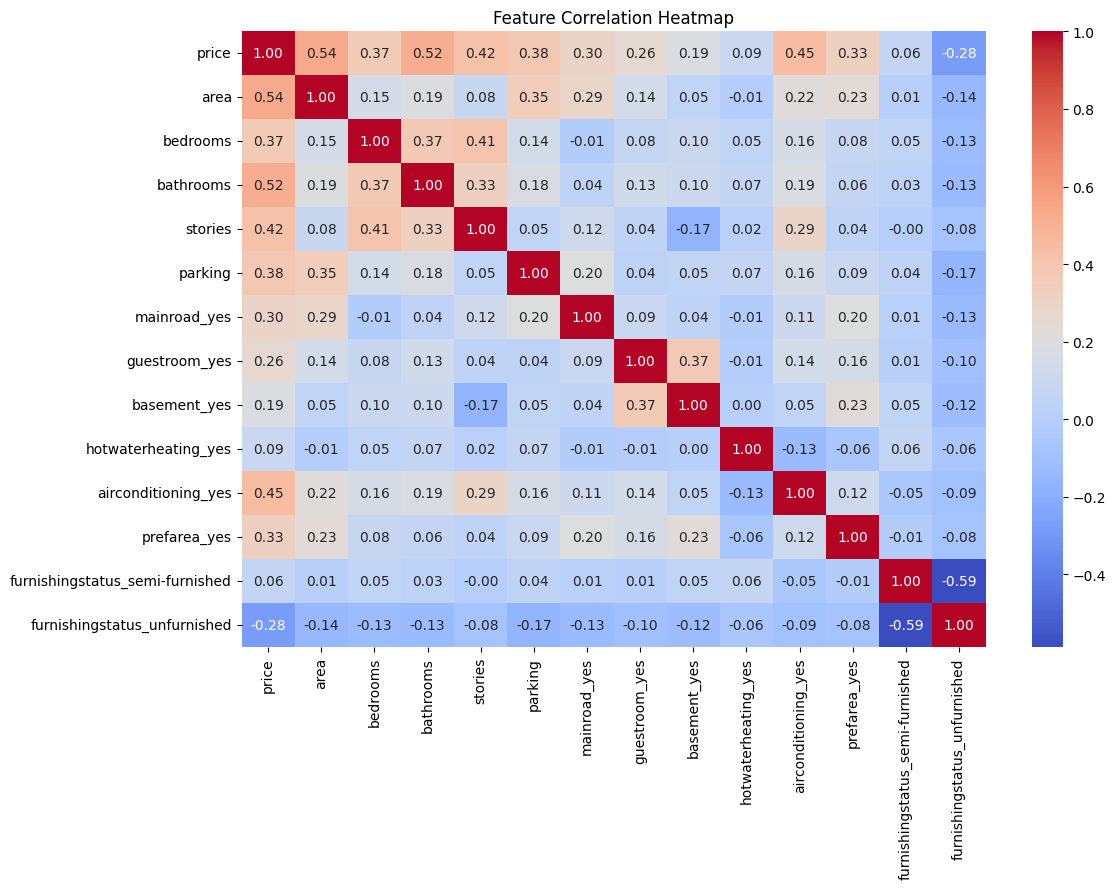

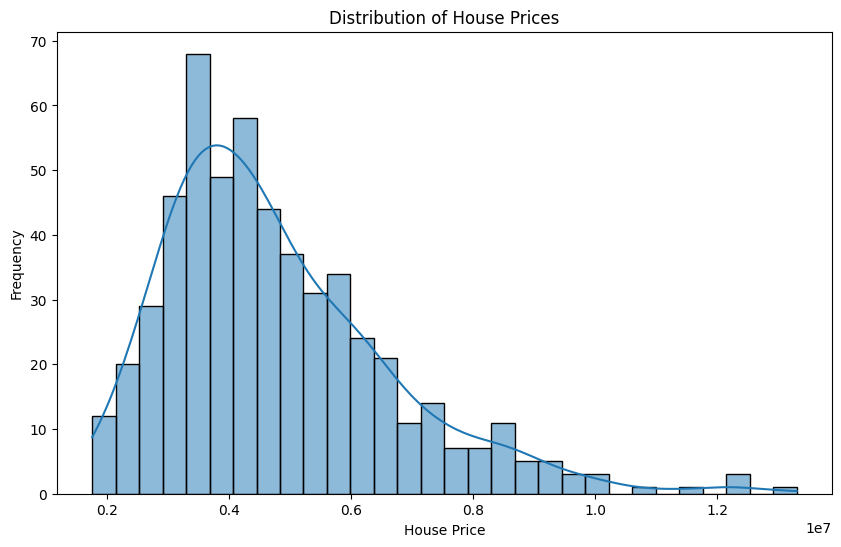

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv("Housing.csv")

# ✅ Step 1: Handle Missing Values

# Fill numeric columns with their mean
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

# Fill categorical columns using probabilistic imputation (preserves original distribution)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].apply(lambda x: x if pd.notna(x) else np.random.choice(df[col].dropna().values))

# ✅ Step 2: Convert Categorical Variables to Numeric
df = pd.get_dummies(df, drop_first=True)

# ✅ Step 3: Ensure "price" is Numeric
df["price"] = pd.to_numeric(df["price"], errors="coerce")

# ✅ Step 4: Data Overview
print(df.head())  # First few rows
print(df.info())  # Dataset structure
print(df.isnull().sum())  # Check missing values

# ✅ Step 5: Visualizations

# Heatmap: Feature Correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Histogram: House Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["price"].dropna(), kde=True, bins=30)  # Drop NaNs for safety
plt.xlabel("House Price")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices")
plt.show()


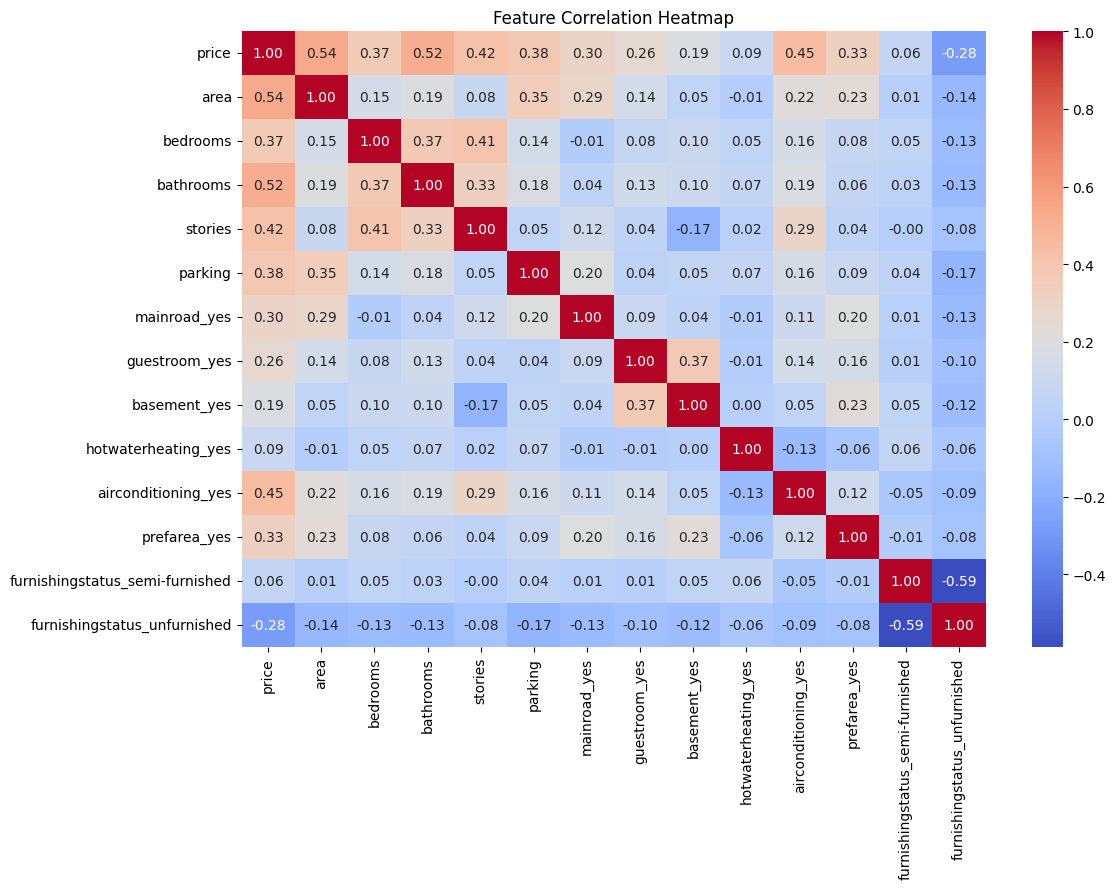

In [5]:
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
# Define X (features) and y (target variable)
X = df.drop("price", axis=1)
y = df["price"]

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 436
Testing samples: 109


In [7]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Print model coefficients
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Model Coefficients: [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  2.24841913e+05  3.67919948e+05  2.31610037e+05  3.90251176e+05
  6.84649885e+05  7.91426736e+05  6.29890565e+05 -1.26881818e+05
 -4.13645062e+05]
Intercept: 260032.35760741215


In [8]:
# Predict on test data
y_pred = model.predict(X_test)

# Show first 5 predictions vs actual values
comparison = pd.DataFrame({"Actual": y_test[:5].values, "Predicted": y_pred[:5]})
print(comparison)



    Actual     Predicted
0  4060000  5.164654e+06
1  6650000  7.224722e+06
2  3710000  3.109863e+06
3  6440000  4.612075e+06
4  2800000  3.294646e+06


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose

# ✅ Step 1: Load Dataset
df = pd.read_csv("Housing.csv")

# ✅ Step 2: Handle Missing Values
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].apply(lambda x: x if pd.notna(x) else np.random.choice(df[col].dropna().values))

df.fillna(df.mean(), inplace=True)  # Fill numeric missing values with mean

# ✅ Step 3: Convert Categorical Variables to Numeric
df = pd.get_dummies(df, drop_first=True)

# ✅ Step 4: Ensure "index_sa" is Numeric
df["index_sa"] = pd.to_numeric(df["index_sa"], errors="coerce")

# ✅ Step 5: Create a Time Index (Assuming `yr` and `period` Represent Year and Month)
df["date"] = pd.to_datetime(df["yr"].astype(str) + "-" + df["period"].astype(str), errors="coerce")

# ✅ Step 6: Set Time Index
df.set_index("date", inplace=True)
df.sort_index(inplace=True)  # Ensure chronological order

# ✅ Step 7: Apply Seasonal Decomposition
decomposition = seasonal_decompose(df["index_sa"].dropna(), model="additive", period=12)  
df["index_sa_trend"] = decomposition.trend  # Extract the seasonally adjusted trend

# ✅ Step 8: Train a Forecasting Model
X = df.drop(columns=["index_nsa", "index_sa", "index_sa_trend"], errors='ignore')  # Drop target variables
y = df["index_sa_trend"].dropna()  # Use trend as target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X.loc[y.index], y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# ✅ Step 9: Predict & Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")

# ✅ Step 10: Future Forecasting
future_X = X.tail(10)  # Last 10 samples for future prediction
future_pred = model.predict(future_X)

print("Future Index SA Predictions:", future_pred)

# ✅ Step 11: Visualizations

# Heatmap: Feature Correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Index SA Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["index_sa"].dropna(), kde=True, bins=30)
plt.xlabel("Index SA")
plt.ylabel("Frequency")
plt.title("Distribution of Seasonally Adjusted Index")
plt.show()

# Trend Plot
plt.figure(figsize=(12, 6))
plt.plot(df["index_sa"], label="Original Index SA", alpha=0.5)
plt.plot(df["index_sa_trend"], label="Trend (Seasonally Adjusted)", linewidth=2, color='red')
plt.xlabel("Year")
plt.ylabel("Index SA")
plt.title("Trend of Seasonally Adjusted Housing Index")
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'statsmodels'